In [2]:
import numpy as py
import pandas as pd
import seaborn as sns
from scipy import stats

data = pd.read_csv("Financial Distress.csv")

Null Values any:  False
Outliers are present


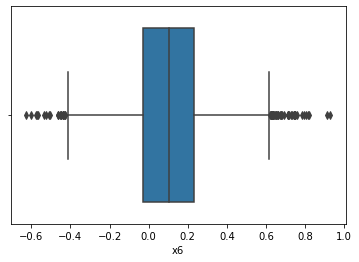

In [3]:
#Feature Selection
X = data.drop(['Company','Time','Financial Distress'],1)

#Target Value
Y = data[['Financial Distress']]

#Data is returning only 5 values
data.head(5)

#No null values in the data
print("Null Values any: ", data.isnull().values.any())

#box plot
sns.boxplot(x=data['x6'])
print("Outliers are present")

# #zscore
# print(stats.zscore(data) < 3)

In [25]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = X.skew(axis = 0)
print(skewvalues)
print("Data with Skew value = 0 ", (skewvalues == 0).any())

x1     2.264785
x2     0.622693
x3    -0.791539
x4     0.881630
x5     0.473657
         ...   
x79    0.115536
x80   -1.483148
x81    0.867730
x82   -0.437312
x83   -0.895814
Length: 83, dtype: float64
Data with Skew value = 0  False


In [26]:
X.x1.describe()

count    3672.000000
mean        0.191179
std         0.071333
min         0.000000
25%         0.153056
50%         0.181808
75%         0.217195
max         1.000000
Name: x1, dtype: float64

In [27]:
# #histogram for unskew data
# def plotHistogram(data):
#     for i in data:
#         data[i].hist()

        
# plotHistogram(X)

In [28]:
z = py.abs(stats.zscore(data))
print(z)
threshold = 3
print(py.where(z > 2))
# filtered_entries = (z < threshold)
# new_df = data[filtered_entries]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Q1 = data_o1.quantile(0.25)
# Q3 = data_o1.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

[[1.54761503 1.60659116 0.38826272 ... 0.39008035 1.78324392 1.16352511]
 [1.54761503 1.3604956  0.56421656 ... 0.40874018 1.88890058 1.23645023]
 [1.54761503 1.11440004 0.51497576 ... 0.58373692 1.99455724 1.30937536]
 ...
 [2.05040802 1.10045999 0.20343663 ... 0.23180522 0.75251599 0.72597437]
 [2.05040802 1.34655554 0.16185836 ... 0.22491945 0.64685932 0.79889949]
 [2.05040802 1.5926511  0.19669421 ... 0.18356734 0.54120266 0.87182462]]
(array([   0,    0,    0, ..., 3671, 3671, 3671]), array([39, 43, 71, ..., 53, 77, 82]))
Company               184.250000
Time                    7.000000
Financial Distress      1.179475
x1                      0.554330
x2                      0.139984
                         ...    
x79                     9.100000
x80                    12.000000
x81                     1.165137
x82                    11.000000
x83                    23.000000
Length: 86, dtype: float64


In [4]:
#Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
#Replacing the continous value with binary value for output
arr = []
for i in Y['Financial Distress']:
    assigned_class = 1
    if i > -0.5:
        assigned_class = 0
    arr.append(assigned_class)
y_class = py.array(arr)

In [9]:
#Split Training and test data sample
X_train, X_test, y_train, y_test = train_test_split(X,y_class,test_size=0.25,random_state=1)

In [10]:
#Logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print("Without any pre processing, the accuracy score is -", accuracy*100)
cm = confusion_matrix(y_test, y_pred) 

Without any pre processing, the accuracy score is - 95.53376906318083


In [6]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = X.skew(axis = 0)
print(skewvalues)
print("Data with Skew value = 0 ", (skewvalues == 0).any(), "\n")

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

# Method to normalize skew data using log tranformation + normalization
def normalizeData(data):
    for i in data:
        print(i)
#         sns.boxplot(x=data[i])
        print("before", data[i].skew())
        #Plus one to avoid nan after skewing
        data[i] = normalize(data[i]+1)
        print("after", data[i].skew())
#         sns.boxplot(x=data[i])

normalizeData(X)

#Need to skew with some other method to handle NAN values
for i in range(79):
    a = 'x'+str(i+1)
    print(X[a].name, X[a].isnull().values.any())

x1     20.058157
x2      1.026241
x3     -0.514097
x4      3.214546
x5      0.871433
         ...    
x79    -0.732060
x80    -0.256838
x81    31.234347
x82     1.156911
x83    -0.023812
Length: 83, dtype: float64
Data with Skew value = 0  False 

x1
before 20.058156982382698
after 20.058156982382698
x2
before 1.0262405041149962
after 1.0262405041149971
x3
before -0.5140967457540233
after -0.5140967457540223
x4
before 3.2145455720126805
after 3.2145455720126814
x5
before 0.8714330722503909
after 0.8714330722503905
x6
before 0.16944506926534944
after 0.16944506926534844
x7
before 21.014228299592414
after 21.01422829959242
x8
before 21.162111011451884
after 21.162111011451877
x9
before 0.7121572648188537
after 0.7121572648188487
x10
before 0.9649171731986402
after 0.9649171731986405
x11
before -0.6158983139981181
after -0.6158983139981191
x12
before 16.12871945962278
after 16.128719459622776
x13
before 0.5140948795902042
after 0.5140948795902057
x14
before 3.3606658419340816
after 3.3606

In [7]:
#Split Training and test data sample
X_train_nor, X_test_nor, y_train, y_test = train_test_split(X,y_class,test_size=0.25,random_state=1)

In [11]:
#Logistic Regression with normalized Data
normalisedModel = LogisticRegression()
normalisedModel.fit(X_train_nor, y_train) 
y_pred = normalisedModel.predict(X_test_nor) 
accuracy = accuracy_score(y_test, y_pred)
print("With normalization, the accuracy score is -", accuracy*100)
cm = confusion_matrix(y_test, y_pred) 

With normalization, the accuracy score is - 95.53376906318083


[0 0 0 ... 0 0 0]
